<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Pioquinto9/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


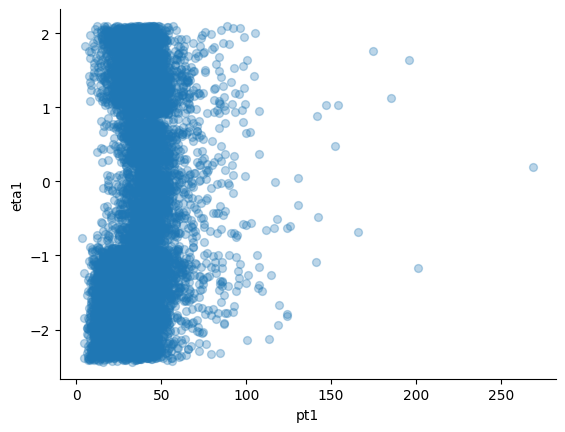

In [16]:
# @title pt1 vs eta1

from matplotlib import pyplot as plt
particles.plot(kind='scatter', x='pt1', y='eta1', s=32, alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df_filtrado = particles[(abs(particles["eta1"]) < 2.5) & (abs(particles["eta2"]) < 2.5)]

In [22]:
import numpy as np #Calculo de masa Invariantess

def masa_invariante(pt1, eta1, phi1, pt2, eta2, phi2):
    delta_eta = eta1 - eta2
    delta_phi = phi1 - phi2
    return np.sqrt(2 * pt1 * pt2 * (np.cosh(delta_eta) - np.cos(delta_phi)))

particles["Minv"] = masa_invariante(
    particles["pt1"], particles["eta1"], particles["phi1"],
    particles["pt2"], particles["eta2"], particles["phi2"]
)

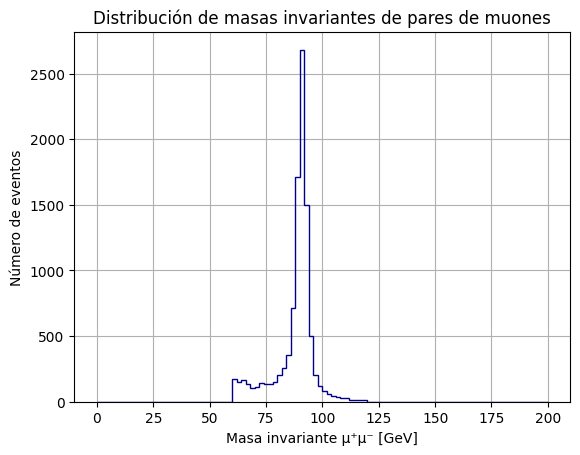

In [27]:
import matplotlib.pyplot as plt

plt.hist(particles["Minv"], bins=100, range=(0, 200), histtype='step', color='darkblue')
plt.xlabel("Masa invariante μ⁺μ⁻ [GeV]")
plt.ylabel("Número de eventos")
plt.title("Distribución de masas invariantes de pares de muones")
plt.grid(True)
plt.show()

In [25]:
muones_aislados = particles[(particles["iso1"] < 0.15) & (particles["iso2"] < 0.15)] #Filtor para ver si los muones son aisladoss

In [26]:
muones_opuestos = muones_aislados[muones_aislados["Q1"] * muones_aislados["Q2"] == -1] #Para asegurar que tengan cargas opuesta